In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set(font_scale=1.2)  # larger font
os.chdir('/Users/xiaodanxu/Documents/SynthFirm.nosync/')


In [2]:
analysis_year = [2018, 2030]
scenario_definition = read_csv('Parameter/opcost_sensitivity_analysis.csv', encoding='utf-8')
# list_of_sc = scenario_definition['Scenario_ID'].unique()
# list_of_sc =['Ref_highp2', 'Ref_highp6', 'HOP_highp2', 'HOP_highp6']
list_of_sc =['Ref_highp6']
regulations = 'ACC and ACT'
list_of_scenarios = [x + ' & ' + regulations for x in list_of_sc]
print(list_of_scenarios)
# scenario_definition.head(5)
print(list_of_sc)

# vehicle_type_by_state = read_csv('inputs/fleet/fleet_composition_by_state.csv')
# list_of_veh_tech = vehicle_type_by_state['vehicle category'].unique().tolist()
# print(list_of_veh_tech)
print(scenario_definition.columns)
scenario_definition_short = \
scenario_definition[['scenario', 'Scenario_ID', 'Diesel_Scenario', 'Elec_Scenario', 'Elec price ($/hWh)']]

scenario_definition_short.head(5)

['Ref_highp6 & ACC and ACT']
['Ref_highp6']
Index(['scenario', 'Scenario_ID', 'Diesel_Scenario', 'Elec_Scenario',
       'Fuel price ($/gal)', 'Elec price ($/hWh)', 'Elec_FC', 'Diesel_FC',
       'NFC', 'Elec_TC', 'Diesel_TC', 'Rail_TC'],
      dtype='object')


,scenario,Scenario_ID,Diesel_Scenario,Elec_Scenario,Elec price ($/hWh)
0,HOP_highp2,"High fuel, 0.6 * electricity",HOP,p2,0.14
1,HOP_highp4,"High fuel, 0.8 * electricity",HOP,p4,0.19
2,HOP_highp6,"High fuel, 1.0 * electricity",HOP,p6,0.23
3,HOP_highp8,"High fuel, 1.2 * electricity",HOP,p8,0.28
4,HOP_highp10,"High fuel, 1.4 * electricity",HOP,p10,0.33


In [8]:
def get_veh_count(data):
    out_fleet = {}
    out_fleet['BEV Class 1&2A Vocational'] = \
    data.loc[data['EV_powertrain (if any)'] == 'Battery Electric', 'Electric Class 1&2A Vocational'].sum()
    out_fleet['BEV Class 2B&3 Vocational'] = \
    data.loc[data['EV_powertrain (if any)'] == 'Battery Electric', 'Electric Class 2B&3 Vocational'].sum()
    out_fleet['BEV Class 4-6 Vocational'] = \
    data.loc[data['EV_powertrain (if any)'] == 'Battery Electric', 'Electric Class 4-6 Vocational'].sum()
    out_fleet['BEV Class 7&8 Vocational'] = \
    data.loc[data['EV_powertrain (if any)'] == 'Battery Electric', 'Electric Class 7&8 Vocational'].sum()
    out_fleet['BEV Class 7&8 Tractor'] = \
    data.loc[data['EV_powertrain (if any)'] == 'Battery Electric', 'Electric Class 7&8 Tractor'].sum()
    
    out_fleet['PHEV Class 1&2A Vocational'] = \
    data.loc[data['EV_powertrain (if any)'] == 'PHEV', 'Electric Class 1&2A Vocational'].sum()
    out_fleet['PHEV Class 2B&3 Vocational'] = \
    data.loc[data['EV_powertrain (if any)'] == 'PHEV', 'Electric Class 2B&3 Vocational'].sum() 
    out_fleet['PHEV Class 4-6 Vocational'] = \
    data.loc[data['EV_powertrain (if any)'] == 'PHEV', 'Electric Class 4-6 Vocational'].sum()
    out_fleet['PHEV Class 7&8 Vocational'] = \
    data.loc[data['EV_powertrain (if any)'] == 'PHEV', 'Electric Class 7&8 Vocational'].sum()        
    out_fleet['PHEV Class 7&8 Tractor'] = \
    data.loc[data['EV_powertrain (if any)'] == 'PHEV', 'Electric Class 7&8 Tractor'].sum()

    out_fleet['H2FC Class 1&2A Vocational'] = \
    data.loc[data['EV_powertrain (if any)'] == 'H2 Fuel Cell', 'Electric Class 1&2A Vocational'].sum()
    out_fleet['H2FC Class 2B&3 Vocational'] = \
    data.loc[data['EV_powertrain (if any)'] == 'H2 Fuel Cell', 'Electric Class 2B&3 Vocational'].sum()
    out_fleet['H2FC Class 4-6 Vocational'] = \
    data.loc[data['EV_powertrain (if any)'] == 'H2 Fuel Cell', 'Electric Class 4-6 Vocational'].sum()
    out_fleet['H2FC Class 7&8 Vocational'] = \
    data.loc[data['EV_powertrain (if any)'] == 'H2 Fuel Cell', 'Electric Class 7&8 Vocational'].sum()
    out_fleet['H2FC Class 7&8 Tractor'] = \
    data.loc[data['EV_powertrain (if any)'] == 'H2 Fuel Cell', 'Electric Class 7&8 Tractor'].sum()

    out_fleet['ICEV Class 1&2A Vocational'] = data.loc[:, 'Diesel Class 1&2A Vocational'].sum() \
    + data.loc[:, 'Gasoline Class 1&2A Vocational'].sum()
    out_fleet['ICEV Class 2B&3 Vocational'] = data.loc[:, 'Diesel Class 2B&3 Vocational'].sum() \
    + data.loc[:, 'Gasoline Class 2B&3 Vocational'].sum()
    out_fleet['ICEV Class 4-6 Vocational'] = data.loc[:, 'Diesel Class 4-6 Vocational'].sum() \
    + data.loc[:, 'Gasoline Class 4-6 Vocational'].sum()
    out_fleet['ICEV Class 7&8 Vocational'] = data.loc[:, 'Diesel Class 7&8 Vocational'].sum()
    out_fleet['ICEV Class 7&8 Tractor'] = data.loc[:, 'Diesel Class 7&8 Tractor'].sum()
    out_fleet_df = pd.DataFrame.from_dict(out_fleet, orient='index')
    out_fleet_df = out_fleet_df.reset_index()
    out_fleet_df.columns = ['vehicle type', 'count']
    return(out_fleet_df)
    

In [4]:
region_name = 'Seattle'
# output_path = 'outputs_' + region_name 
output_path_lookup = {2018: 'outputs_Seattle', 
                      2030: 'outputs_Seattle',
                     2050: 'outputs_Seattle_2050'}
firm_file = 'synthetic_firms_with_fleet_mc_adjusted.csv'
carrier_file = 'synthetic_carriers.csv'
lease_file = 'synthetic_leasing_company.csv'
region_code = [531, 532, 539, 411] 
# region_code = [62, 64, 65, 69] #Bay Area

In [9]:
# Load fleet results and generate summary statistics
out_fleet_mix = None
for year in analysis_year:
    output_path = output_path_lookup[year]
    for sc in list_of_scenarios:
        print('processing scenario ' + sc + ' from year ' + str(year))
        file_path = os.path.join(output_path, str(year), sc)
        firms_with_fleet = read_csv(os.path.join(file_path, firm_file))
        carriers_with_fleet = read_csv(os.path.join(file_path, carrier_file))
        leasing_with_fleet = read_csv(os.path.join(file_path, lease_file))
    
        # select regional fleet only
        
        firms_with_fleet = firms_with_fleet.loc[firms_with_fleet['FAFZONE'].isin(region_code)]
        carriers_with_fleet = carriers_with_fleet.loc[carriers_with_fleet['FAFZONE'].isin(region_code)]
        leasing_with_fleet = leasing_with_fleet.loc[leasing_with_fleet['FAFZONE'].isin(region_code)]
        firm_fleet_agg = get_veh_count(firms_with_fleet)
        firm_fleet_agg.loc[:, 'source'] = 'firms'
        carrier_fleet_agg = get_veh_count(carriers_with_fleet)
        carrier_fleet_agg.loc[:, 'source'] = 'carrier'
        lease_fleet_agg = get_veh_count(leasing_with_fleet)
        lease_fleet_agg.loc[:, 'source'] = 'lease'

        all_fleet_agg = pd.concat([firm_fleet_agg, carrier_fleet_agg, lease_fleet_agg])
        all_fleet_agg.loc[:, 'year'] = year
        all_fleet_agg.loc[:, 'scenario'] = sc
        out_fleet_mix = pd.concat([out_fleet_mix, all_fleet_agg])

out_fleet_mix.head(5)
# out_fleet_mix.head(5)

processing scenario Ref_highp6 & ACC and ACT from year 2018
processing scenario Ref_highp6 & ACC and ACT from year 2030


,vehicle type,count,source,year,scenario
0,BEV Class 1&2A Vocational,0.0,firms,2018,Ref_highp6 & ACC and ACT
1,BEV Class 2B&3 Vocational,0.0,firms,2018,Ref_highp6 & ACC and ACT
2,BEV Class 4-6 Vocational,0.0,firms,2018,Ref_highp6 & ACC and ACT
3,BEV Class 7&8 Vocational,0.0,firms,2018,Ref_highp6 & ACC and ACT
4,BEV Class 7&8 Tractor,0.0,firms,2018,Ref_highp6 & ACC and ACT


In [11]:
print(firms_with_fleet.FAFZONE.unique())
print(output_path)

[411 539 532 531]
outputs_Seattle


In [12]:
# generate fleet composition by fraction
# print(out_fleet_mix.vehicle_type.unique())
out_fleet_mix_agg = \
out_fleet_mix.groupby(['vehicle type', 'year', 'scenario'])[['count']].sum()
out_fleet_mix_agg = out_fleet_mix_agg.reset_index()
# out_fleet_mix.loc[out_fleet_mix['vehicle typ'] == 'Gasoline Class 4-6 Vocational', 'vehicle_type'] = 'Diesel Class 4-6 Vocational'
# out_fleet_mix_agg.loc[:, 'Case'] = out_fleet_mix_agg.loc[:, 'year'].astype(str) + ' ' + out_fleet_mix_agg.loc[:, 'scenario']
out_fleet_mix_agg.loc[:, 'percentage'] = 100 * out_fleet_mix_agg.loc[:, 'count'] / \
out_fleet_mix_agg.groupby(['year', 'scenario'])['count'].transform('sum')
out_fleet_mix_agg.head(10)

out_fleet_mix_agg.to_csv(os.path.join(output_path, 'fleet_composition_by_scenario.csv'))

In [9]:
print(out_fleet_mix_agg['vehicle type'].unique())

['BEV Class 1&2A Vocational' 'BEV Class 2&B3 Vocational'
 'BEV Class 4-6 Vocational' 'BEV Class 7&8 Tractor'
 'BEV Class 7&8 Vocational' 'H2FC Class 1&2A Vocational'
 'H2FC Class 2&B3 Vocational' 'H2FC Class 4-6 Vocational'
 'H2FC Class 7&8 Tractor' 'H2FC Class 7&8 Vocational'
 'ICEV Class 1&2A Vocational' 'ICEV Class 2&B3 Vocational'
 'ICEV Class 4-6 Vocational' 'ICEV Class 7&8 Tractor'
 'ICEV Class 7&8 Vocational' 'PHEV Class 1&2A Vocational'
 'PHEV Class 2&B3 Vocational' 'PHEV Class 4-6 Vocational'
 'PHEV Class 7&8 Tractor' 'PHEV Class 7&8 Vocational']


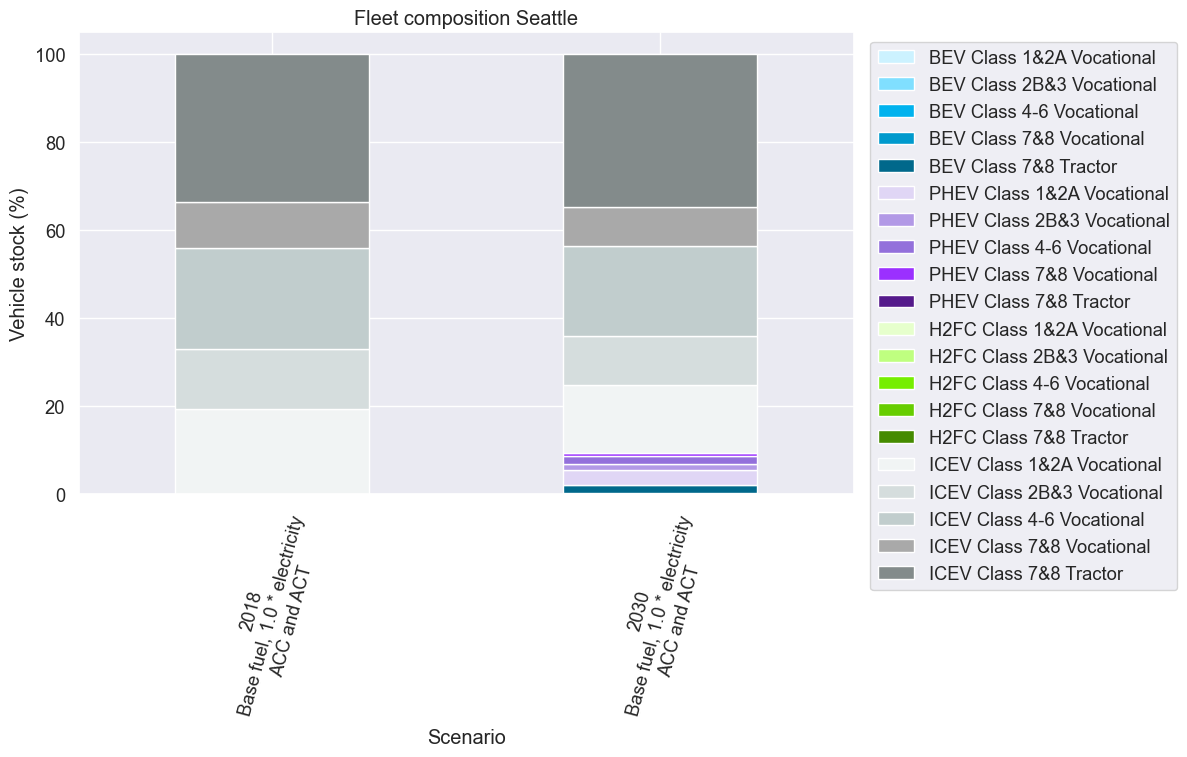

,BEV Class 1&2A Vocational,BEV Class 2B&3 Vocational,BEV Class 4-6 Vocational,BEV Class 7&8 Vocational,BEV Class 7&8 Tractor,PHEV Class 1&2A Vocational,PHEV Class 2B&3 Vocational,PHEV Class 4-6 Vocational,PHEV Class 7&8 Vocational,PHEV Class 7&8 Tractor,...,H2FC Class 4-6 Vocational,H2FC Class 7&8 Vocational,H2FC Class 7&8 Tractor,ICEV Class 1&2A Vocational,ICEV Class 2B&3 Vocational,ICEV Class 4-6 Vocational,ICEV Class 7&8 Vocational,ICEV Class 7&8 Tractor,Elec_Scenario,scenario_name
0,0.000000,0.000000,0.003395,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,19.431686,13.496840,23.09677,10.505410,33.465898,p6,"2018\nBase fuel, 1.0 * electricity\nACC and ACT"
1,0.098269,0.031994,0.058504,0.025596,2.022963,3.401009,1.215789,1.86619,0.631205,0.0,...,0.0,0.0,0.0,15.473883,11.272556,20.44582,8.727627,34.728596,p6,"2030\nBase fuel, 1.0 * electricity\nACC and ACT"


In [13]:
# combined fleet mix plot
combined_fleet_to_plot = \
pd.pivot_table(out_fleet_mix_agg,
               values='percentage', 
               index=['year', 'scenario'],
               columns=['vehicle type'], 
               aggfunc=np.sum, sort = False)
combined_fleet_to_plot = combined_fleet_to_plot.reset_index()

combined_fleet_to_plot = combined_fleet_to_plot[['year', 'scenario',
                                                 'BEV Class 1&2A Vocational', 
                                                 'BEV Class 2B&3 Vocational',
                                                 'BEV Class 4-6 Vocational', 
                                                 'BEV Class 7&8 Vocational',
                                                 'BEV Class 7&8 Tractor',
                                                 'PHEV Class 1&2A Vocational',
                                                 'PHEV Class 2B&3 Vocational',
                                                 'PHEV Class 4-6 Vocational', 
                                                 'PHEV Class 7&8 Vocational',  
                                                 'PHEV Class 7&8 Tractor', 
                                                 'H2FC Class 1&2A Vocational',
                                                 'H2FC Class 2B&3 Vocational',
                                                 'H2FC Class 4-6 Vocational', 
                                                 'H2FC Class 7&8 Vocational', 
                                                 'H2FC Class 7&8 Tractor', 
                                                 'ICEV Class 1&2A Vocational',
                                                 'ICEV Class 2B&3 Vocational',
                                                 'ICEV Class 4-6 Vocational', 
                                                 'ICEV Class 7&8 Vocational',
                                                 'ICEV Class 7&8 Tractor']]
colors = ["#ccf2ff", "#80dfff", "#00b2ee", "#009acd", "#00688b", # the blues   
          "#e0d6f5", "#b299e6", "#9370DB", "#9B30FF", "#551A8B", # the purples
          "#e6ffcc", "#bfff80", "#76ee00", "#66cd00", "#458b00", # the greens
          "#f1f4f4", "#d5dddd", "#c1cdcd", "#a9a9a9", "#838b8b"] # the greys
      
combined_fleet_to_plot.loc[:, 'fuel_price'] = \
combined_fleet_to_plot.loc[:, 'scenario'].str.split(' & ').str[0]

combined_fleet_to_plot.loc[:, 'regulation'] = \
combined_fleet_to_plot.loc[:, 'scenario'].str.split(' & ').str[1]

scenario_definition_short.rename(columns = {'scenario': 'fuel_price'}, inplace = True)
combined_fleet_to_plot = pd.merge(combined_fleet_to_plot,
                                  scenario_definition_short,
                                  on = 'fuel_price',
                                  how = 'left')

combined_fleet_to_plot = \
combined_fleet_to_plot.sort_values(by = 'Elec price ($/hWh)')
combined_fleet_to_plot.loc[:, 'scenario_name'] = \
combined_fleet_to_plot.loc[:, 'year'].astype(str) + '\n' + \
combined_fleet_to_plot.loc[:, 'Scenario_ID'] + '\n' + \
combined_fleet_to_plot.loc[:, 'regulation']
# combined_fleet_to_plot = \
#     combined_fleet_to_plot.sort_values(by = 'Diesel_Scenario', ascending = False)

combined_fleet_to_plot = \
combined_fleet_to_plot.drop(columns = ['Scenario_ID', 'year', 'regulation', 'fuel_price',
                                       'Diesel_Scenario', 'scenario', 'Elec price ($/hWh)'])

plot_dir = 'plots_' + region_name

combined_fleet_to_plot.plot.bar(x= 'scenario_name', 
                                stacked=True, color = colors, figsize = (10, 6))
plt.xticks(rotation = 75)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.ylabel('Vehicle stock (%)')
plt.xlabel('Scenario')
plt.title('Fleet composition ' + region_name)
plt.savefig(os.path.join(plot_dir, 'fleet_composition_baseline.png'), 
            dpi = 300, bbox_inches = 'tight')
plt.show()
combined_fleet_to_plot.head(5) 

In [14]:
body_type_lookup = {
 'BEV Class 1&2A Vocational': 'Class 1&2A Vocational', 
 'BEV Class 2B&3 Vocational': 'Class 2B&3 Vocational',
 'BEV Class 4-6 Vocational': 'Class 4-6 Vocational', 
 'BEV Class 7&8 Vocational': 'Class 7&8 Vocational',
 'BEV Class 7&8 Tractor': 'Class 7&8 Tractor',
 'PHEV Class 1&2A Vocational': 'Class 1&2A Vocational',
 'PHEV Class 2B&3 Vocational': 'Class 2B&3 Vocational',
 'PHEV Class 4-6 Vocational': 'Class 4-6 Vocational', 
 'PHEV Class 7&8 Vocational': 'Class 7&8 Vocational',  
 'PHEV Class 7&8 Tractor': 'Class 7&8 Tractor', 
 'H2FC Class 1&2A Vocational': 'Class 1&2A Vocational',
 'H2FC Class 2B&3 Vocational': 'Class 2B&3 Vocational',
 'H2FC Class 4-6 Vocational': 'Class 4-6 Vocational', 
 'H2FC Class 7&8 Vocational': 'Class 7&8 Vocational', 
 'H2FC Class 7&8 Tractor': 'Class 7&8 Tractor', 
 'ICEV Class 1&2A Vocational': 'Class 1&2A Vocational',
 'ICEV Class 2B&3 Vocational': 'Class 2B&3 Vocational',
 'ICEV Class 4-6 Vocational': 'Class 4-6 Vocational', 
 'ICEV Class 7&8 Vocational': 'Class 7&8 Vocational',
 'ICEV Class 7&8 Tractor': 'Class 7&8 Tractor'
}
out_fleet_mix_agg.loc[:, 'powertrain'] = \
out_fleet_mix_agg.loc[:, 'vehicle type'].str.split(' ').str[0]
out_fleet_mix_agg.loc[:, 'body type'] = \
out_fleet_mix_agg.loc[:, 'vehicle type'].map(body_type_lookup)
out_fleet_mix_agg.loc[:, 'fuel_price'] = \
out_fleet_mix_agg.loc[:, 'scenario'].str.split(' & ').str[0]

out_fleet_mix_agg.loc[:, 'regulation'] = \
out_fleet_mix_agg.loc[:, 'scenario'].str.split(' & ').str[1]

# scenario_definition_short.rename(columns = {'scenario': 'fuel_price'}, inplace = True)
out_fleet_mix_agg = pd.merge(out_fleet_mix_agg,
                                  scenario_definition_short,
                                  on = 'fuel_price',
                                  how = 'left')

out_fleet_mix_agg = \
out_fleet_mix_agg.sort_values(by = 'Elec price ($/hWh)')
out_fleet_mix_agg.loc[:, 'scenario_name'] = \
out_fleet_mix_agg.loc[:, 'year'].astype(str) + '\n' + \
out_fleet_mix_agg.loc[:, 'Scenario_ID'] + '\n' + \
out_fleet_mix_agg.loc[:, 'regulation']

out_fleet_mix_agg.head(5)

,vehicle type,year,scenario,count,percentage,powertrain,body type,fuel_price,regulation,Scenario_ID,Diesel_Scenario,Elec_Scenario,Elec price ($/hWh),scenario_name
0,BEV Class 1&2A Vocational,2018,Ref_highp6 & ACC and ACT,0.0,0.000000,BEV,Class 1&2A Vocational,Ref_highp6,ACC and ACT,"Base fuel, 1.0 * electricity",Ref,p6,0.23,"2018\nBase fuel, 1.0 * electricity\nACC and ACT"
1,BEV Class 1&2A Vocational,2030,Ref_highp6 & ACC and ACT,215.0,0.098269,BEV,Class 1&2A Vocational,Ref_highp6,ACC and ACT,"Base fuel, 1.0 * electricity",Ref,p6,0.23,"2030\nBase fuel, 1.0 * electricity\nACC and ACT"
2,BEV Class 2B&3 Vocational,2018,Ref_highp6 & ACC and ACT,0.0,0.000000,BEV,Class 2B&3 Vocational,Ref_highp6,ACC and ACT,"Base fuel, 1.0 * electricity",Ref,p6,0.23,"2018\nBase fuel, 1.0 * electricity\nACC and ACT"
3,BEV Class 2B&3 Vocational,2030,Ref_highp6 & ACC and ACT,70.0,0.031994,BEV,Class 2B&3 Vocational,Ref_highp6,ACC and ACT,"Base fuel, 1.0 * electricity",Ref,p6,0.23,"2030\nBase fuel, 1.0 * electricity\nACC and ACT"
4,BEV Class 4-6 Vocational,2018,Ref_highp6 & ACC and ACT,7.0,0.003395,BEV,Class 4-6 Vocational,Ref_highp6,ACC and ACT,"Base fuel, 1.0 * electricity",Ref,p6,0.23,"2018\nBase fuel, 1.0 * electricity\nACC and ACT"


Class 1&2A Vocational
Class 2B&3 Vocational
Class 4-6 Vocational
Class 7&8 Tractor
Class 7&8 Vocational


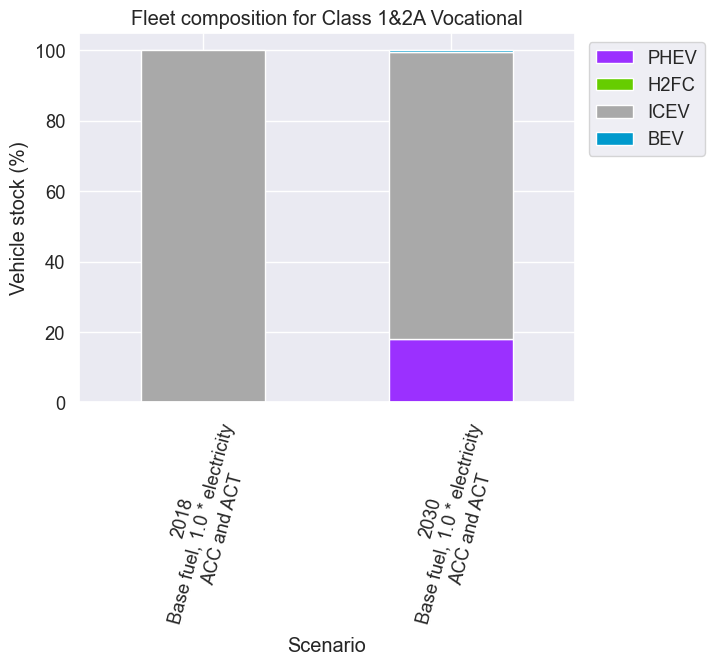

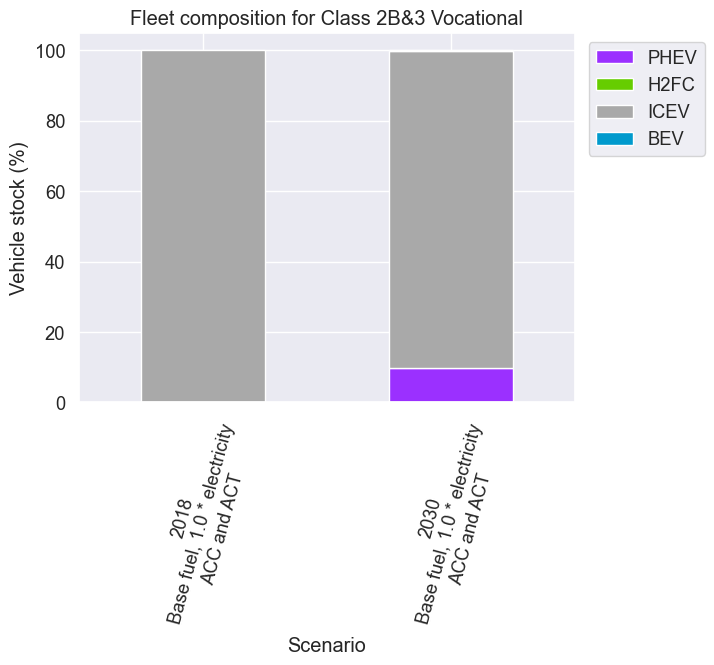

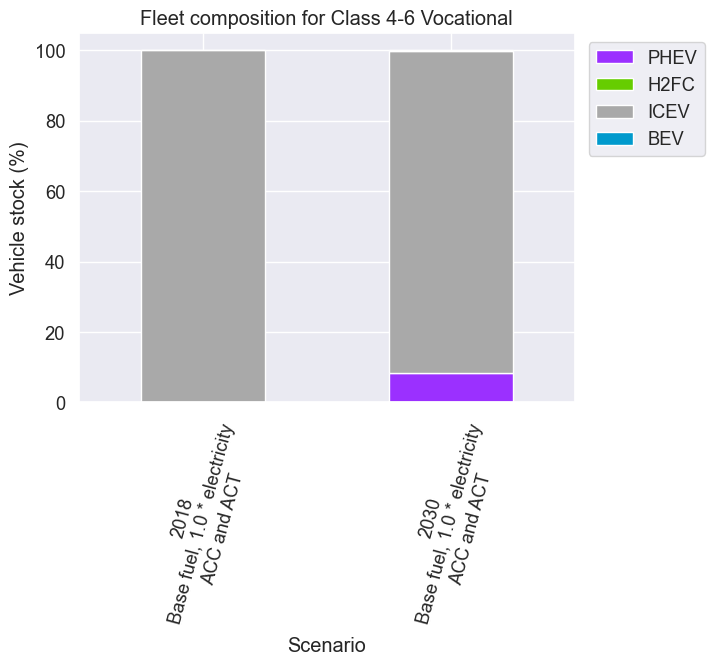

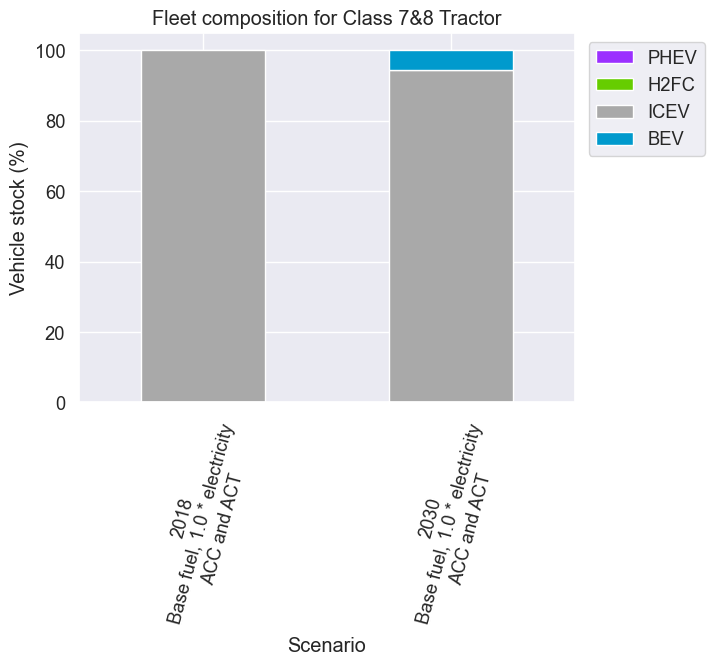

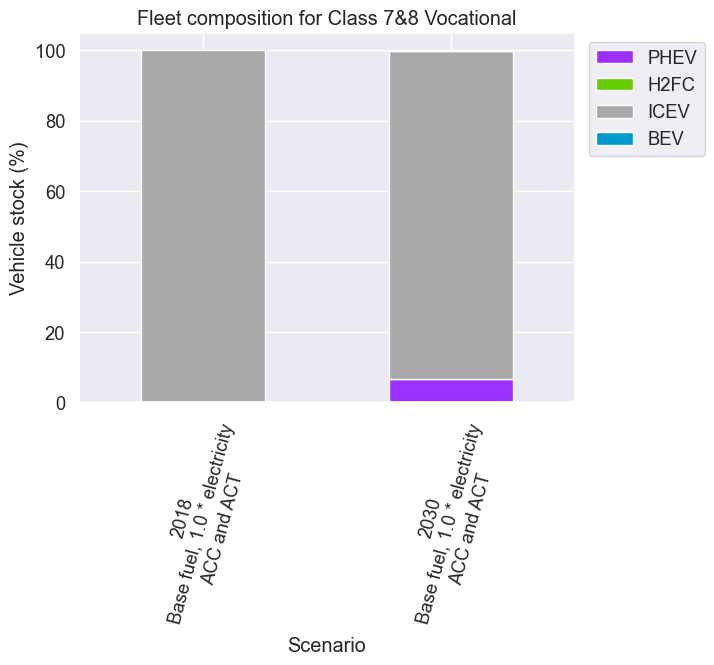

In [15]:
#fleet mix plot by vehicle class
# out_fleet_mix_agg.loc[:, 'powertrain'] = \
# out_fleet_mix_agg.loc[:, 'vehicle type'].str.split(' ').str[0]
# out_fleet_mix_agg.loc[:, 'body type'] = \
# out_fleet_mix_agg.loc[:, 'vehicle type'].str.split(' ', 1).str[1]
colors_2 = ["#9B30FF", # the purples] 
    "#66cd00",  # the greens
    "#a9a9a9", # the greys
    "#009acd"] # the blues] 

body_types = out_fleet_mix_agg['body type'].unique()
for bt in body_types:
    print(bt)
    out_fleet_mix_selected = \
    out_fleet_mix_agg.loc[out_fleet_mix_agg['body type'] == bt]
    out_fleet_mix_selected.loc[:, 'percentage'] = \
    100 * out_fleet_mix_selected.loc[:, 'count'] / \
    out_fleet_mix_selected.groupby(['scenario_name'])['count'].transform('sum')
    out_fleet_mix_selected = pd.pivot_table(out_fleet_mix_selected,
               values='percentage', 
               index=['scenario_name'],
               columns=['powertrain'], 
               aggfunc=np.sum, sort = False)
    out_fleet_mix_selected = \
    out_fleet_mix_selected[['PHEV', 'H2FC', 'ICEV', 'BEV']]
    out_fleet_mix_selected = out_fleet_mix_selected.reset_index()

    out_fleet_mix_selected.plot.bar(x= 'scenario_name', 
                                    stacked=True, color = colors_2)
    plt.xticks(rotation = 75)
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.ylabel('Vehicle stock (%)')
    plt.xlabel('Scenario')
    plt.title('Fleet composition for ' + bt)
    plt.savefig(os.path.join(plot_dir, 'fleet_composition_' + bt + '.png'), dpi = 300, 
                bbox_inches = 'tight')
    
#     break
# print(out_fleet_mix_selected.head(5))